# **Importing Essential Libraries**
In this section, we are importing the essential libraries that we require for simple kNN Neighbour Classifier's Algorithm

In [ ]:
# Importing essential libraries for Machine Learning
import pandas as pd
import numpy as np
import sklearn as sk
from   sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.model_selection import train_test_split
from   collections import Counter

# **Loading the Dataset**

In this section, we are using the dataset iris provided by the **sklearn** library. We have loaded it into the dataframe (similar to a relational table) using the pandas library.

In [ ]:
iris = load_iris() # Loading the dataset

# Converting the dataset to a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

df.head() # Prints the first 5 tuples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# **Splitting the dataset**
In this section, we have spllited the dataset into two parts (80% for training puposes and 20% for testing purpose).


In [ ]:
x = iris.data # Independent Values
y = iris.target # Values to be predicted / Dependent Values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Spliting the data randomly into the test and training data

# **kNN Neighbour Classifier's Algorithm**
In this section, we have caclulated the eucilden distance and then made prediction based on the number of neighbors (k).

In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
def knn_predict(X_train, y_train, x_test, k=3):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train] # Calculates the similarity index according Eucliden Index
    k_indices = np.argsort(distances)[:k] # Sorts array according to the Eucliden Index
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# **Measuring Accuracy**
In this section, we have measured the accuracy of the ML model by using a simple ratio of correct predicted values and the total predicted values.

In [ ]:
correct = 0
for i in range(len(X_test)):
    prediction = knn_predict(X_train, y_train, X_test[i], k=3)
    if prediction == y_test[i]:
        correct += 1

accuracy = correct / len(X_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


# **Data Visualization**
In this section, we have used seaborn library for data visualization purposes.

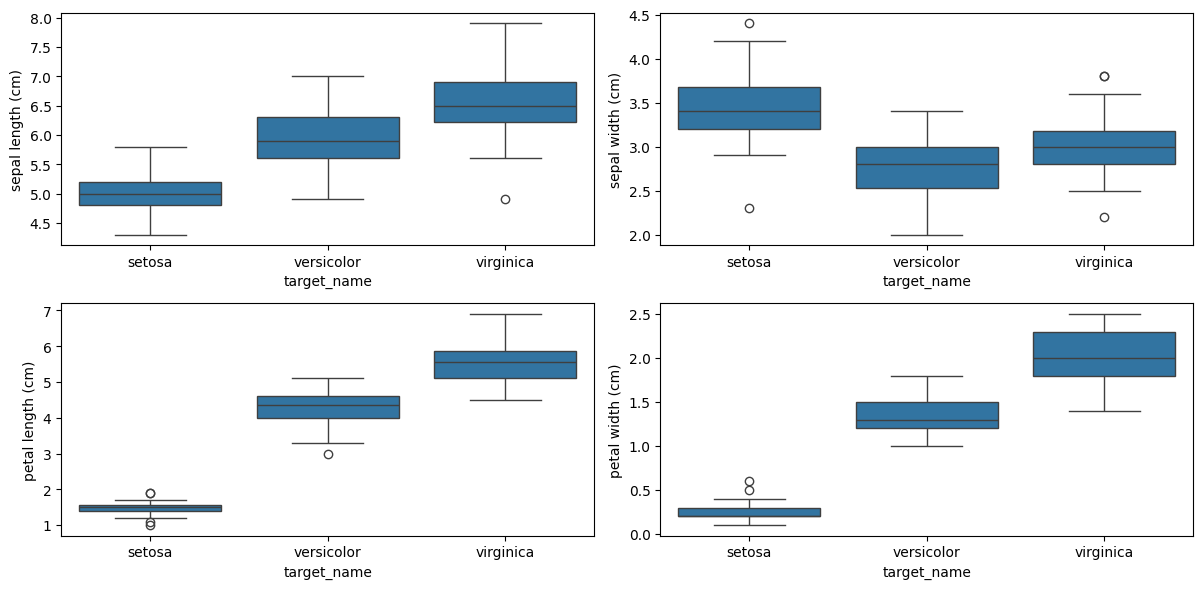

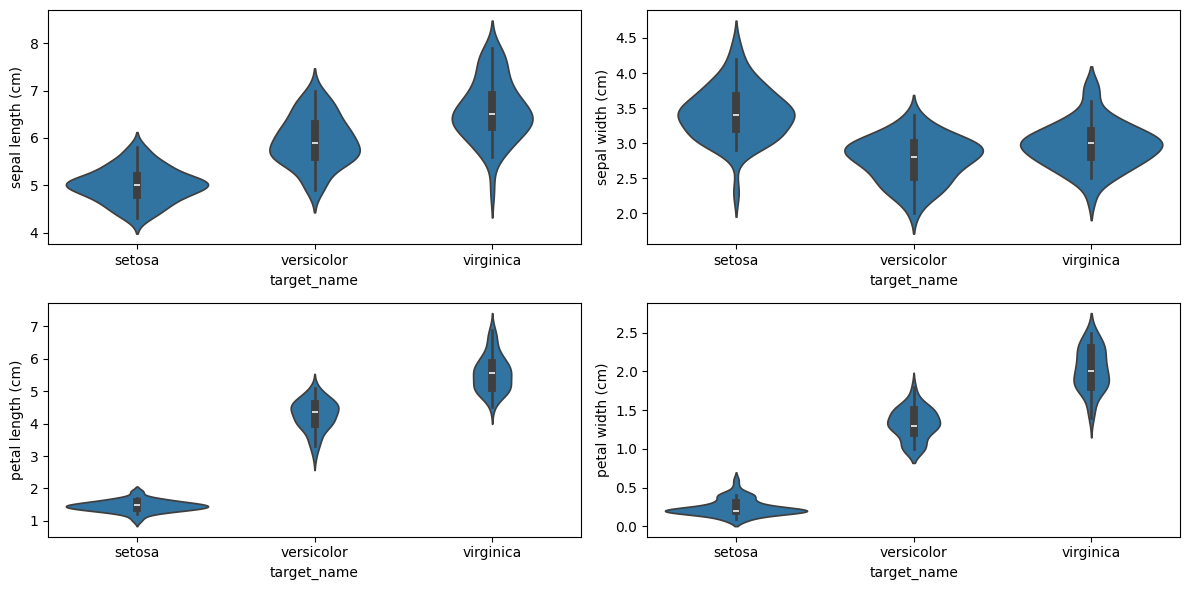

In [ ]:
# Boxplot to visualize distribution of features across different target classes
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target_name', y=feature, data=df)
plt.tight_layout()

# Violin plot for more detailed distribution visualization
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='target_name', y=feature, data=df)
plt.tight_layout()